## Exploring employee exit surveys

This project will explore why employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education Institute (TAFE) resign. We will be focusing our analysis on the length of time the employee was employed for.

In [13]:
import pandas as pd
import numpy as np

dete_survey = pd.read_csv('dete_survey.csv')
tafe_survey = pd.read_csv('tafe_survey.csv')

dete_survey.info()
dete_survey.head()

tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In dete_survey, there are values called 'Not stated' instead of NaN. I will set these values to be null.

In [14]:
dete_survey = pd.read_csv('dete_survey.csv',na_values='Not Stated')


dete_bad_cols = dete_survey.columns[28:49]
tafe_bad_cols = tafe_survey.columns[17:66]
print(dete_survey.columns)
print(dete_bad_cols)
print(tafe_survey.columns)
print(tafe_bad_cols)

dete_survey_updated = dete_survey.drop(dete_bad_cols,axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_bad_cols,axis=1)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

Certain columns from each survey were removed as they will not be included in the Analysis. These columns were to do with how the employee felt about the workplace. While these are worthy of investigation, this project will not focus on these factors. I produced updated dataframes that did not include these columns.

In [15]:
print(dete_survey_updated.columns)
dete_survey_updated.columns = dete_survey_updated.columns.str.rstrip().str.replace(' ','_').str.lower()
print(dete_survey_updated.columns)

print(tafe_survey_updated.columns)
tafe_new_names = {'Record ID':'id',
                  'CESSATION YEAR':'cease_date',
                  'Reason for ceasing employment':'separationtype',
                  'Gender. What is your Gender?':'gender',
                  'CurrentAge. Current Age':'age',
                  'Employment Type. Employment Type':'employment_status',
                  'Classification. Classification':'position',
                  'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service',
                  'LengthofServiceCurrent. Length of Service at current workplace (in years)':'role_service',
                  'Contributing Factors. Dissatisfaction':'cf_dis',
                  'Contributing Factors. Job Dissatisfaction':'cf_jobdis'}
tafe_survey_updated = tafe_survey_updated.rename(tafe_new_names,axis=1)
print(tafe_survey_updated.columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'int

I have standardised the names of the columns in dete_survey_updated and I have changed some of the names in tafe_survey_updated.

In [16]:
print(dete_survey_updated['separationtype'].unique())
print(tafe_survey_updated['separationtype'].unique())

['Ill Health Retirement' 'Voluntary Early Retirement (VER)'
 'Resignation-Other reasons' 'Age Retirement' 'Resignation-Other employer'
 'Resignation-Move overseas/interstate' 'Other' 'Contract Expired'
 'Termination']
['Contract Expired' 'Retirement' 'Resignation' 'Retrenchment/ Redundancy'
 'Termination' 'Transfer' nan]


Above I looked at the reasons why people left employment for each survey. I will create new dataframes that only include when people resign.

In [17]:
pattern = r'[Rr]esignation'
dete_resignations = dete_survey_updated.loc[dete_survey_updated['separationtype'].str.contains(pattern)]
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype'].str.contains(pattern,na=False)]

print(dete_resignations.head())
print(tafe_resignations.head())

    id                        separationtype cease_date  dete_start_date  \
3    4             Resignation-Other reasons    05/2012           2005.0   
5    6             Resignation-Other reasons    05/2012           1994.0   
8    9             Resignation-Other reasons    07/2012           2009.0   
9   10            Resignation-Other employer       2012           1997.0   
11  12  Resignation-Move overseas/interstate       2012           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status  ...   work_life_balance  \


In [18]:
print(dete_resignations['cease_date'].value_counts())
print(tafe_resignations['cease_date'].value_counts())

dete_resignations['cease_date'] = dete_resignations['cease_date'].str.split('/').str[-1].astype(float)
print(dete_resignations['cease_date'].value_counts())

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
2010         1
07/2012      1
Name: cease_date, dtype: int64
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64
2013.0    146
2012.0    129
2014.0     22
2010.0      2
2006.0      1
Name: cease_date, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Now we have the date as a float for both dataframes. I am going to drop the years before 2010 as they have very few values and my not be a good indication of the year. This leaves the years 2010-2013. We will also create a institute_service column for DETE to match the one for TAFE.

In [19]:
dete_resignations = dete_resignations[dete_resignations['cease_date']>2009]
tafe_resignations = tafe_resignations[tafe_resignations['cease_date']>2009]
print(dete_resignations['cease_date'].value_counts())
print(tafe_resignations['cease_date'].value_counts())

2013.0    146
2012.0    129
2014.0     22
2010.0      2
Name: cease_date, dtype: int64
2011.0    116
2012.0     94
2010.0     68
2013.0     55
Name: cease_date, dtype: int64


In [20]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']
print(dete_resignations.head())

    id                        separationtype  cease_date  dete_start_date  \
3    4             Resignation-Other reasons      2012.0           2005.0   
5    6             Resignation-Other reasons      2012.0           1994.0   
8    9             Resignation-Other reasons      2012.0           2009.0   
9   10            Resignation-Other employer      2012.0           1997.0   
11  12  Resignation-Move overseas/interstate      2012.0           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit    employment_status        ...          wo

I now create a new column, 'dissatisfied', which can tell us whether they were dissatisfied or not. It combines information from the cf_dis and cf_jobdis columns (either of which indicate dissatisfaction) to determine whether the employee was dissatisfied.

In [21]:
#print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts())
#print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts())

def update_vals(element):
    if(pd.isnull(element)):
        return np.nan
    elif('-' in element):
        return False
    else:
        return True

#print(tafe_resignations[['cf_dis','cf_jobdis']])
tafe_resignations[['cf_dis','cf_jobdis']] = tafe_resignations[['cf_dis','cf_jobdis']].applymap(update_vals)
print(tafe_resignations[['cf_dis','cf_jobdis']])
tafe_resignations['dissatisfied'] = tafe_resignations[['cf_dis','cf_jobdis']].any(axis=1,skipna=False)
print(tafe_resignations['dissatisfied'].value_counts())


    cf_dis cf_jobdis
3    False     False
4    False     False
5    False     False
6    False     False
7    False     False
9    False     False
10   False     False
13   False     False
14    True      True
15   False     False
16     NaN       NaN
17   False      True
18     NaN       NaN
19   False     False
20    True      True
21   False     False
22   False     False
23   False     False
24   False     False
26    True      True
27   False     False
29   False     False
32   False     False
36   False     False
37   False     False
39   False     False
40    True     False
41   False     False
42   False     False
45   False     False
..     ...       ...
659  False     False
660  False     False
661  False      True
665  False     False
666  False     False
669  False     False
670    NaN       NaN
671  False      True
675   True      True
676  False     False
677  False     False
678  False     False
679  False     False
681  False     False
682  False     False
683  False   

In [22]:
print(dete_resignations.columns)
dete_dis_cols = [['job_dissatisfaction','dissatisfaction_with_the_department',]]
print(dete_resignations[['job_dissatisfaction','dissatisfaction_with_the_department']])

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'institute_service'],
      dtype='object')
     job_dissatisfaction  dissatisfaction_with_the_department
3                  False                                False
5                  False                                False
8                  False                    

In [23]:
dete_dis_cols = ['job_dissatisfaction',
                 'dissatisfaction_with_the_department',
                 'physical_work_environment',
                 'lack_of_recognition',
                 'lack_of_job_security',
                 'work_location',
                 'employment_conditions',
                 'work_life_balance',
                 'workload']

dete_resignations['dissatisfied'] = dete_resignations[dete_dis_cols].any(axis=1,skipna=False)
print(dete_resignations['dissatisfied'].value_counts())

False    153
True     146
Name: dissatisfied, dtype: int64


In [24]:
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

I have now made a 'dissatisfied' column in both dataframes by using .any() to select any reason why they left the job due to job dissatisfatction. I used df.copy() to avoid the SettingWithCopy Warning.

In [27]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'

combined = pd.concat([dete_resignations_up,
                     tafe_resignations_up])
combined_updated = combined.dropna(thresh=500,axis=1)

combined_updated.columns

Index(['age', 'cease_date', 'dissatisfied', 'employment_status', 'gender',
       'id', 'institute', 'institute_service', 'position', 'separationtype'],
      dtype='object')

In [29]:
combined_updated['institute_service'].value_counts(dropna=False)

NaN                   74
Less than 1 year      73
1-2                   64
3-4                   61
5-6                   33
11-20                 24
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   19
6.0                   17
4.0                   16
2.0                   14
9.0                   14
7.0                   13
More than 20 years    10
8.0                    8
13.0                   8
15.0                   7
20.0                   7
10.0                   6
12.0                   6
14.0                   6
17.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
11.0                   4
23.0                   4
21.0                   3
32.0                   3
19.0                   3
39.0                   3
26.0                   2
28.0                   2
30.0                   2
25.0                   2
36.0                   2


This finds the average time an employee who has been working there for over 20 years has been doing so.

In [30]:
s = 0
t = 0
for element in combined_updated['institute_service']:
    try:
        e = int(element)
        if(e>20):
            s += e
            t += 1
    except:
        pass

print(s/t)

28.953488372093023


Doing data cleaning to extract the ages of the employees

In [48]:
str_length = combined_updated['institute_service'].astype(str)
str_length = str_length.str.split('.').str.get(0)
str_length = str_length.str.split('-').str.get(0)
str_length = str_length.str.replace('Less than ','')
str_length = str_length.str.replace('More than ','')
str_length = str_length.str.replace(' years','')
str_length = str_length.str.replace(' year','')
str_length.value_counts()
str_length = str_length.astype(float)
str_length.value_counts(dropna=False)

 1.0     159
 3.0      81
NaN       74
 5.0      56
 7.0      34
 11.0     28
 0.0      19
 20.0     17
 6.0      17
 4.0      16
 9.0      14
 2.0      14
 13.0      8
 8.0       8
 15.0      7
 22.0      6
 10.0      6
 17.0      6
 14.0      6
 12.0      6
 16.0      5
 18.0      5
 24.0      4
 23.0      4
 21.0      3
 39.0      3
 32.0      3
 19.0      3
 36.0      2
 30.0      2
 25.0      2
 26.0      2
 28.0      2
 42.0      1
 29.0      1
 35.0      1
 27.0      1
 41.0      1
 49.0      1
 38.0      1
 34.0      1
 33.0      1
 31.0      1
Name: institute_service, dtype: int64

This function groups employees into categories for how experienced they are.

In [50]:
def servcat(element):
    if(pd.isnull(element)):
        return np.nan
    elif(element<3):
        return 'New'
    elif(element<7):
        return 'Experienced'
    elif(element<11):
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(servcat)

combined_updated['service_cat'].value_counts()

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


New            192
Experienced    170
Veteran        134
Established     62
Name: service_cat, dtype: int64

In [57]:
print(combined_updated['dissatisfied'].value_counts(dropna=False))
combined_updated.fillna(value={'dissatisfied':False},inplace=True)
print(combined_updated['dissatisfied'].value_counts(dropna=False))

False    390
True     235
NaN        7
Name: dissatisfied, dtype: int64
False    397
True     235
Name: dissatisfied, dtype: int64


/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Now I can produce a bar chart of the percentage dissatisfied.

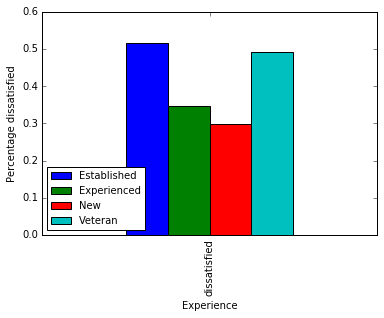

In [81]:
%matplotlib inline
pivot = combined_updated.pivot_table(values='dissatisfied',columns=['service_cat']).plot(kind='bar')
pivot.set_xlabel('Experience')
pivot.legend(loc=3,prop={'size':10})
pivot.set_ylabel('Percentage dissatisfied')